In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set()

### ***Selecting specific data types***

* Create a subset of `so_survey_df` consisting of only the numeric (`int` and `float`) columns.

* Print the column names contained in `so_survey_df_num`.

In [2]:
so_survey_df = pd.read_csv('https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv')

# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=[int, float])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


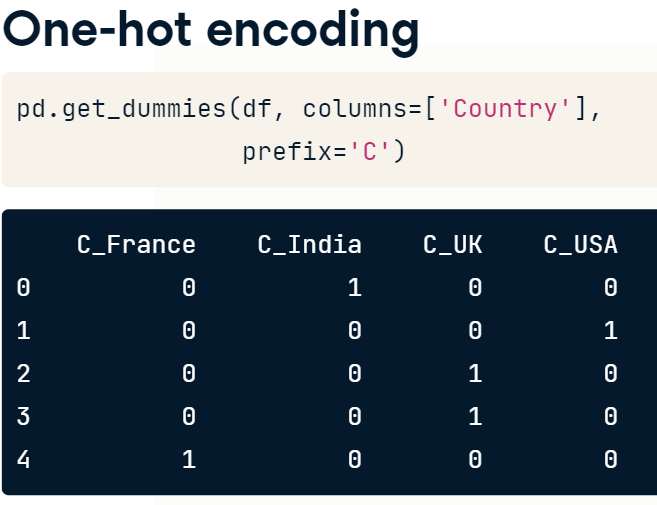

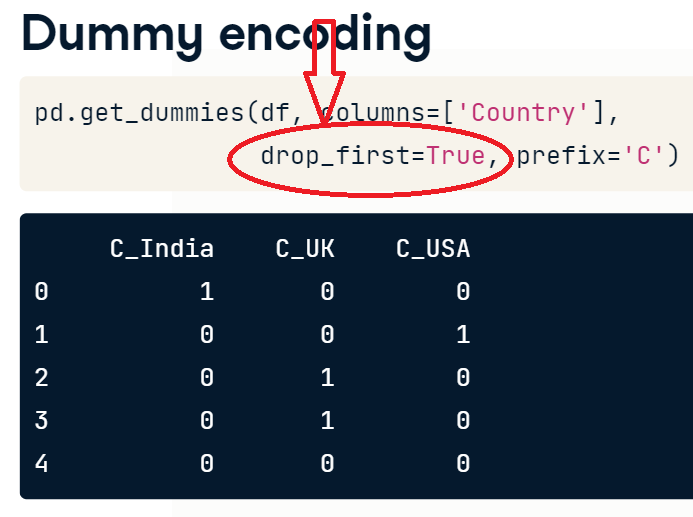

### ***One-hot encoding and dummy variables***

To use categorical variables in a machine learning model, you first need to represent them in a quantitative way. The two most common approaches are to one-hot encode the variables using or to use dummy variables. In this exercise, you will create both types of encoding, and compare the created column sets. We will continue using the same DataFrame from previous lesson loaded as `so_survey_df` and focusing on its Country column.

* One-hot encode the `Country` column, adding `"OH"` as a prefix for each column.


* Create dummy variables for the `Country` column, adding `"DM"` as a prefix for each column.

In [5]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns, "\n")

# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=['Country'], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object') 

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


 Did you notice that the column for France was missing when you created dummy variables? Now you can choose to use one-hot encoding or dummy variables where appropriate.

 ### ***Dealing with uncommon categories***

Some features can have many different categories but a very uneven distribution of their occurrences. Take for example Data Science's favorite languages to code in, some common choices are Python, R, and Julia, but there can be individuals with bespoke choices, like FORTRAN, C etc. In these cases, you may not want to create a feature for each value, but only the more common occurrences.

* Extract the `Country` column of `so_survey_df` as a series and assign it to `countries`.

* Find the counts of each category in the newly created `countries` series.

* Create a mask for values occurring less than 10 times in `country_counts`.

* Print the first 5 rows of the mask.

In [6]:
# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(countries.value_counts())

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### ***Binarizing columns***

While numeric values can often be used without any feature engineering, there will be cases when some form of manipulation can be useful. For example on some occasions, you might not care about the magnitude of a value but only care about its direction, or if it exists at all. In these situations, you will want to binarize a column. In the `so_survey_df` data, you have a large number of survey respondents that are working voluntarily (without pay). You will create a new column titled `Paid_Job` indicating whether each person is paid (their salary is greater than zero).

* Create a new column called `Paid_Job` filled with zeros.
* Replace all the `Paid_Job` values with a `1` where the corresponding `ConvertedSalary` is greater than `0`.

In [7]:
# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df['ConvertedSalary'] > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              NaN
1         1          70841.0
2         0              NaN
3         1          21426.0
4         1          41671.0


### ***Binning values***'

For many continuous values you will care less about the exact value of a numeric column, but instead care about the bucket it falls into. This can be useful when plotting values, or simplifying your machine learning models. It is mostly used on continuous variables where accuracy is not the biggest concern e.g. age, height, wages.

Bins are created using **`pd.cut(df['column_name'], bins)`** where **`bins`** can be 

* an integer specifying the number of evenly spaced bins, or 
* a list of bin boundaries.


1. Bin the value of the `ConvertedSalary` column in `so_survey_df` into `5` equal bins, in a new column called `equal_binned`.


2. Bin the `ConvertedSalary` column using the boundaries in the list `bins` and label the bins using `labels`.

In [8]:
# Bin the continuous variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=5)

# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head())

# Import numpy
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=bins, labels=labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0                  NaN              NaN
1  (-2000.0, 400000.0]          70841.0
2                  NaN              NaN
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0
  boundary_binned  ConvertedSalary
0             NaN              NaN
1          Medium          70841.0
2             NaN              NaN
3             Low          21426.0
4             Low          41671.0


### ***How sparse is my data?***

* Subset the DataFrame to only include the `'Age'` and `'Gender'` columns.
* Print the number of non-missing values in both columns.

In [9]:
# Subset the DataFrame
sub_df = so_survey_df[['Age', 'Gender']]

# Print the number of non-missing values
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     999 non-null    int64 
 1   Gender  693 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


There are 693 non-missing entries in the `Gender` column.

### ***Finding the missing values***

* Print the locations of the missing values in the first 10 rows.
* Print the locations of the non-missing values in the first 10 rows.

In [11]:
# Print the locations of the missing values
print(sub_df.head(10).isnull())


# Print the locations of the non-missing values
print(sub_df.head(10).notnull())

     Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True
    Age  Gender
0  True    True
1  True    True
2  True   False
3  True    True
4  True    True
5  True    True
6  True    True
7  True    True
8  True    True
9  True   False


### ***Listwise deletion***

The simplest way to deal with missing values in your dataset when they are occurring entirely at random is to remove those rows, also called 'listwise deletion'.

Depending on the use case, you will sometimes want to remove all missing values in your data while other times you may want to only remove a particular column if too many values are missing in that column.

* Drop all rows with missing values in `so_survey_df`.

* Drop all columns with missing values in `so_survey_df`.

* Drop all rows in `so_survey_df` where `'Gender'` is missing.

In [12]:
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna()

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=['Gender'])

# Print the shape of the new DataFrame
print(no_gender.shape)

(264, 14)
(999, 8)
(693, 14)


Dropping all rows that contain any missing values may greatly reduce the size of your dataset.

### ***Replacing missing values with constants***

While removing missing data entirely maybe a correct approach in many situations, this may result in a lot of information being omitted from your models.

You may find categorical columns where the missing value is a valid piece of information in itself, such as someone refusing to answer a question in a survey. In these cases, you can fill all missing values with a new category entirely, for example 'No response given'.


* Print the count of occurrences of each category in `so_survey_df`'s Gender column.
* Replace all missing values in the `Gender` column with the string `'Not Given'`. Make changes to the original DataFrame.

In [13]:
# Print the count of occurrences
print(so_survey_df['Gender'].value_counts())

# Replace missing values
so_survey_df['Gender'].fillna(value='Not Given', inplace=True)

# Print the count of each value
print(so_survey_df['Gender'].value_counts())  

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64
Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
T

By filling in these missing values you can use the columns in your analyses.

### ***Filling continuous missing values***

In the last lesson, you dealt with different methods of removing data missing values and filling in missing values with a fixed string. These approaches are valid in many cases, particularly when dealing with categorical columns but have limited use when working with continuous values. In these cases, it may be most valid to fill the missing values in the column with a value calculated from the entries present in the column.


* Replace the missing values in the `StackOverflowJobsRecommend` column with its mean. Make changes directly to the original DataFrame.

* Round the decimal values that you introduced in the `StackOverflowJobsRecommend` column.

In [14]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


## ***Imputing values in predictive models***

Apply the measures of central tendency (mean/median etc.) calculated on the train set to both the train and test sets.  Values calculated on the train test should be applied to both DataFrames.

### ***Dealing with stray characters (I)***

In this exercise, you will work with the `RawSalary` column of `so_survey_df` which contains the wages of the respondents along with the currency symbols and commas, such as `$42,000`. When importing data from Microsoft Excel, more often that not you will come across data in this form.

* Remove the commas (`,`) from the `RawSalary` column.
* Remove the dollar (`$`) signs from the `RawSalary` column.

In [15]:
# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


### ***Dealing with stray characters (II)***

In the last exercise, you could tell quickly based off of the `df.head()` call which characters were causing an issue. In many cases this will not be so apparent. There will often be values deep within a column that are preventing you from casting a column as a numeric type so that it can be used in a model or further feature engineering.

One approach to finding these values is to force the column to the data type desired using **`pd.to_numeric()`**, coercing any values causing issues to `NaN`, Then filtering the DataFrame by just the rows containing the `NaN` values.

Try to cast the `RawSalary` column as a `float` and it will fail as an additional character can now be found in it. Find the character and remove it so the column can be cast as a float.

* Attempt to convert the `RawSalary` column of `so_survey_df` to numeric values coercing all failures into null values.

* Find the indexes of the rows containing NaNs.

* Print the rows in `RawSalary` based on these indexes.

In [21]:
# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals[numeric_vals.isna()].index

# Print the relevant rows
print(so_survey_df['RawSalary'].loc[idx])

# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype(float)

# Print the column
print(so_survey_df['RawSalary'])

0            NaN
2            NaN
4      £41671.00
6            NaN
8            NaN
         ...    
989          NaN
990          NaN
992          NaN
994          NaN
997          NaN
Name: RawSalary, Length: 401, dtype: object
0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


Remember that even after removing all the relevant characters, you still need to change the type of the column to numeric if you want to plot these continuous values.

### ***What does your data look like? (I)***

* Generate a histogram of all columns in the `so_numeric_df` DataFrame.
* Generate box plots of the `Age` and `Years Experience` columns in the `so_numeric_df` DataFrame.
* Generate a box plot of the `ConvertedSalary` column in the `so_numeric_df` DataFrame.

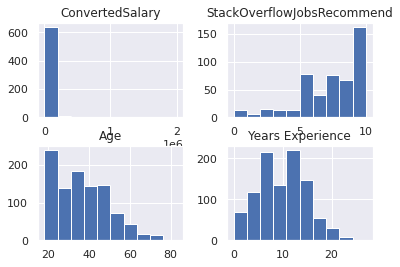

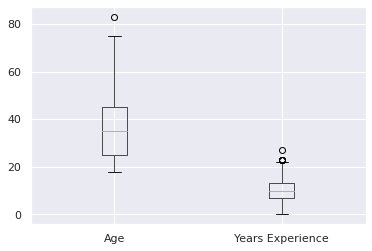

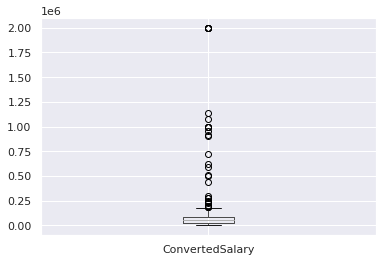

In [3]:
# Create a histogram
so_numeric_df.hist()
plt.show()

# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

The distrbutions of columns in a dataset can vary quite a bit.

### ***What does your data look like? (II)***

In the previous exercise you looked at the distribution of individual columns. While this is a good start, a more detailed view of how different features interact with each other may be useful as this can impact your decision on what to transform and how.


* Plot pairwise relationships in the `so_numeric_df` dataset.
* Print the summary statistics of the `so_numeric_df` DataFrame.

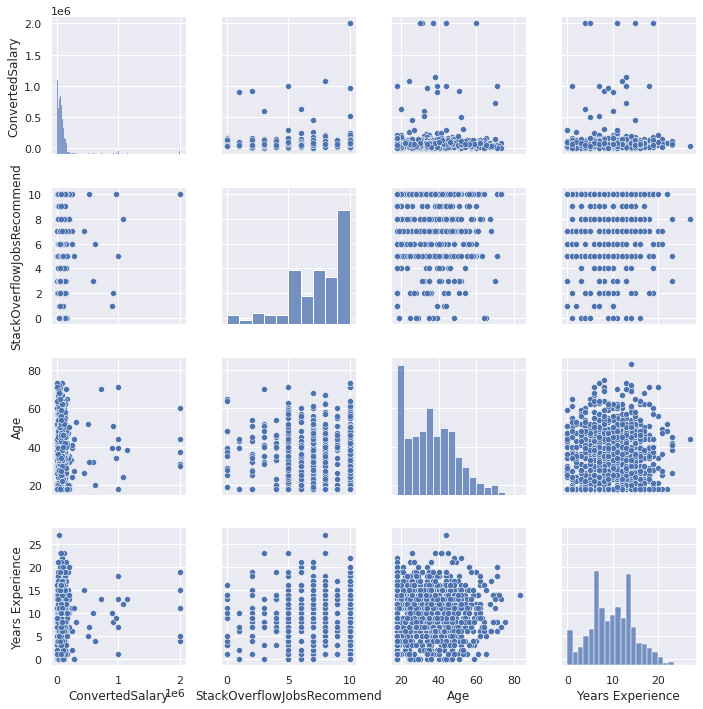

       ConvertedSalary  StackOverflowJobsRecommend         Age  \
count     6.650000e+02                  487.000000  999.000000   
mean      9.256517e+04                    7.061602   36.003003   
std       2.091344e+05                    2.621591   13.255127   
min       0.000000e+00                    0.000000   18.000000   
25%       2.755000e+04                    5.000000   25.000000   
50%       5.556200e+04                    7.000000   35.000000   
75%       8.823800e+04                   10.000000   45.000000   
max       2.000000e+06                   10.000000   83.000000   

       Years Experience  
count        999.000000  
mean           9.961962  
std            4.878129  
min            0.000000  
25%            7.000000  
50%           10.000000  
75%           13.000000  
max           27.000000  


In [5]:
# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

# Print summary statistics
print(so_numeric_df.describe())

### ***Normalization***

As discussed in the video, in normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest.

When using scikit-learn (the most commonly used machine learning library in Python) you can use a **`MinMaxScaler`** to apply normalization. (It is called this as it scales your values between a minimum and maximum value.)

* Import **`MinMaxScaler`** from sklearn's preprocessing module.
* Instantiate the **`MinMaxScaler()`** as `MM_scaler`.
* Fit the **`MinMaxScaler`** on the `Age` column of `so_numeric_df`.
* Transform the same column with the scaler you just fit.

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Did you notice that all values have been scaled between 0 and 1?

# ***Standardization***

While normalization can be useful for scaling a column between two data points, it is hard to compare two scaled columns if even one of them is overly affected by outliers. One commonly used solution to this is called standardization, where instead of having a strict upper and lower bound, you center the data around its mean, and calculate the number of standard deviations away from mean each data point is.

In [10]:
from sklearn.preprocessing import StandardScaler

SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())
print(so_numeric_df['Age_SS'].describe())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39
count    9.990000e+02
mean     9.935329e-17
std      1.000501e+00
min     -1.358872e+00
25%     -8.305099e-01
50%     -7.570696e-02
75%      6.790960e-01
max      3.547347e+00
Name: Age_SS, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### ***Log transformation***

In the previous exercises you scaled the data linearly, which will not affect the data's shape. This works great if your data is normally distributed (or closely normally distributed), an assumption that a lot of machine learning models make. Sometimes you will work with data that closely conforms to normality, e.g the height or weight of a population. On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population. In this exercise you will use a log transform on the `ConvertedSalary` column in the `so_numeric_df` DataFrame as it has a large amount of its data centered around the lower values, but contains very high values also. These distributions are said to have a long right tail.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


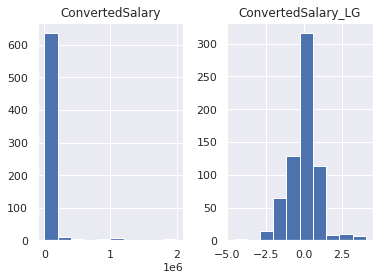

In [11]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

Did you notice the change in the shape of the distribution? `ConvertedSalary_LG` column looks much more normal than the original `ConvertedSalary` column.

### ***Percentage based outlier removal***

One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no outliers, this will still remove the same top N percentage from the dataset.

* Find the 95th quantile of the `ConvertedSalary` column.
* Trim the `so_numeric_df` DataFrame to retain all rows where `ConvertedSalary` is less than it's 95th quantile.
* Plot the histogram of `so_numeric_df[['ConvertedSalary']]`.
* Plot the histogram of `trimmed_df[['ConvertedSalary']]`

In [ ]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

### ***Statistical outlier removal***

While removing the top N% of your data is useful for ensuring that very spurious points are removed, it does have the disadvantage of always removing the same proportion of points, even if the data is correct. A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.

* Calculate the standard deviation and mean of the `ConvertedSalary` column of `so_numeric_df`.

* Calculate the upper and lower bounds as three standard deviations away from the mean in both the directions.

* Trim the `so_numeric_df` DataFrame to retain all rows where `ConvertedSalary` is within the lower and upper bounds.

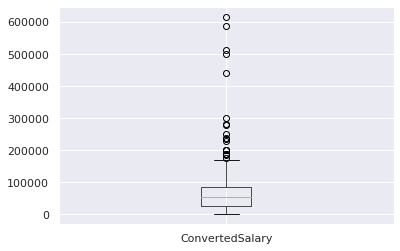

In [12]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] > lower) & (so_numeric_df['ConvertedSalary'] < upper)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

Did you notice the scale change on the y-axis?

### ***Train and testing transformations (I)***

So far you have created scalers based on a column, and then applied the scaler to the same data that it was trained on. When creating machine learning models you will generally build your models on historic data (train set) and apply your model to new unseen data (test set). In these cases you will need to ensure that the same scaling is being applied to both the training and test data.

To do this in practice you train the scaler on the train set, and keep the trained scaler to apply it to the test set. ***You should never retrain a scaler on the test set.***

For this exercise and the next, we split the `so_numeric_df` DataFrame into train (`so_train_numeric`) and test (`so_test_numeric`) sets.


* Instantiate the **`StandardScaler()`** as `SS_scaler`.
* Fit the **`StandardScaler`** on the `Age` column.
* Transform the `Age` column in the test set (`so_test_numeric`).

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

### ***Train and testing transformations (II)***

Similar to applying the same scaler to both your training and test sets, if you have removed outliers from the train set, you probably want to do the same on the test set as well. Once again you should ensure that you use the thresholds calculated ***only from the train set*** to remove outliers from the test set.

Similar to the last exercise, we split the `so_numeric_df` DataFrame into train (`so_train_numeric`) and test (`so_test_numeric`) sets.

* Calculate the standard deviation and mean of the `ConvertedSalary` column.
* Calculate the `upper` and `lower` bounds as three standard deviations away from the mean in both the directions.
* Trim the `so_test_numeric` DataFrame to retain all rows where `ConvertedSalary` is within the lower and upper bounds.

In [ ]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

### ***Cleaning up your text***

Unstructured text data cannot be directly used in most analyses. Multiple steps need to be taken to go from a long free form string to a set of numeric columns in the right format that can be ingested by a machine learning model. The first step of this process is to standardize the data and eliminate any characters that could cause problems later on in your analytic pipeline.

In this chapter you will be working with a new dataset containing the inaugural speeches of the presidents of the United States loaded as `speech_df`, with the speeches stored in the text column.


* Replace all non letter characters in the text column with a whitespace.
* Make all characters in the newly created `text_clean` column lower case.

In [4]:
speech_df = pd.read_csv('inaugural_speeches.csv')

# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


### ***High level text features***

Once the text has been cleaned and standardized you can begin creating features from the data. The most fundamental information you can calculate about free form text is its size, such as its length and number of words. In this exercise (and the rest of this chapter), you will focus on the cleaned/transformed text column (`text_clean`) you created in the last exercise.

* Record the character length of each speech in the `char_count` column.
* Record the word count of each speech in the `word_count` column.
* Record the average word length of each speech in the `avg_word_length` column.

In [14]:
s = speech_df['text_clean'].iloc[0]
print(s[:100])
print(len(s), len(s.split()))

fellow citizens of the senate and of the house of representatives   among the vicissitudes incident 
8616 1432


In [15]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

# Print the first 5 rows of these columns
speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']].head()

,text_clean,char_cnt,word_cnt,avg_word_length
0,fellow citizens of the senate and of the house...,8616,1432,6.016760
1,fellow citizens i am again called upon by th...,787,135,5.829630
2,when it was first perceived in early times t...,13871,2323,5.971158
3,friends and fellow citizens called upon to u...,10144,1736,5.843318
4,proceeding fellow citizens to that qualifica...,12902,2169,5.948363


### ***Counting words (I)***

Once high level information has been recorded you can begin creating features based on the actual content of each text. One way to do this is to approach it in a similar way to how you worked with categorical variables in the earlier lessons.

* For each unique word in the dataset a column is created.
* For each entry, the number of times this word occurs is counted and the count value is entered into the respective column.

These "count" columns can then be used to train machine learning models.

* Instantiate **`CountVectorizer`** and assign it to `cv`.
* Fit the vectorizer to the `text_clean` column.
* Print the feature names generated by the vectorizer.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Print feature names
print(cv.get_feature_names()[:10])

['abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding', 'abilities']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


This vectorizer can be applied to both the text it was trained on, and new texts.

### ***Counting words (II)***

Once the vectorizer has been fit to the data, it can be used to transform the text to an array representing the word counts. This array will have a row per block of text and a column for each of the features generated by the vectorizer that you observed in the last exercise.

The vectorizer to you fit in the last exercise (`cv`) is available in your workspace.

* Apply the vectorizer to the `text_clean` column.
* Convert this transformed (sparse) array into a numpy array with counts.

In [23]:
# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()
print(cv_array)
print(cv_array.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(58, 9043)


The speeches have 9043 unique words, which is a lot! In the next exercise, you will see how to create a limited set of features.

### ***Limiting your features***

As you have seen, using the **`CountVectorizer`** with its default settings creates a feature for every single word in your corpus. This can create far too many features, often including ones that will provide very little analytical value.

For this purpose **`CountVectorizer`** has parameters that you can set to reduce the number of features:

* **`min_df`** : Use only words that occur in more than this percentage of documents. This can be used to remove outlier words that will not generalize across texts.

* **`max_df`** : Use only words that occur in less than this percentage of documents. This is useful to eliminate very common words that occur in every corpus without adding value such as "and" or "the".


* Limit the number of features in the **`CountVectorizer`** by setting the minimum number of documents a word can appear to 20% and the maximum to 80%.

* Fit and apply the vectorizer on `text_clean` column in one step.

* Convert this transformed (sparse) array into a numpy array with counts.



In [24]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=0.2, max_df=0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)

(58, 818)


The number of features (unique words) greatly reduced from 9043 to 818.

### ***Text to DataFrame***

Now that you have generated these count based features in an array you will need to reformat them so that they can be combined with the rest of the dataset. This can be achieved by converting the array into a pandas DataFrame, with the feature names you found earlier as the column names, and then concatenate it with the original DataFrame.

The numpy array (`cv_array`) and the vectorizer (`cv`) you fit in the last exercise are available in your workspace.


* Create a DataFrame `cv_df` containing the `cv_array` as the values and the feature names as the column names.

* Add the prefix `Counts_` to the column names for ease of identification.

* Concatenate this DataFrame (`cv_df`) to the original DataFrame (`speech_df`) column wise.

In [25]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(data=cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
speech_df_new.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Name,Inaugural Address,Date,text,text_clean,char_cnt,word_cnt,avg_word_length,Counts_abiding,Counts_ability,...,Counts_women,Counts_words,Counts_work,Counts_wrong,Counts_year,Counts_years,Counts_yet,Counts_you,Counts_young,Counts_your
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...,fellow citizens of the senate and of the house...,8616,1432,6.016760,0,0,...,0,0,0,0,0,1,0,5,0,9
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...,fellow citizens i am again called upon by th...,787,135,5.829630,0,0,...,0,0,0,0,0,0,0,0,0,1
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t...",when it was first perceived in early times t...,13871,2323,5.971158,0,0,...,0,0,0,0,2,3,0,0,0,1
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...,friends and fellow citizens called upon to u...,10144,1736,5.843318,0,0,...,0,0,1,2,0,0,2,7,0,7
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica...",proceeding fellow citizens to that qualifica...,12902,2169,5.948363,0,0,...,0,0,0,0,2,2,2,4,0,4


With the new features combined with the orginial DataFrame they can be now used for ML models or analysis.

### ***Tf-idf***

While counts of occurrences of words can be useful to build models, words that occur many times may skew the results undesirably. To limit these common words from overpowering your model a form of normalization can be used. In this lesson you will be using ***Term frequency-inverse document frequency (Tf-idf)*** as was discussed in the video. ***Tf-idf*** has the effect of reducing the value of common words, while increasing the weight of words that do not occur in many documents.


* Instantiate **`TfidfVectorizer`** while limiting the number of features to `100` and removing English stop words.

* Fit and apply the vectorizer on `text_clean` column in one step.

* Create a DataFrame `tv_df` containing the weights of the words and the feature names as the column names.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

   TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  \
0      0.000000              0.133415       0.000000        0.105388   
1      0.000000              0.261016       0.266097        0.000000   
2      0.000000              0.092436       0.157058        0.073018   
3      0.000000              0.092693       0.000000        0.000000   
4      0.041334              0.039761       0.000000        0.031408   

   TFIDF_americans  TFIDF_believe  TFIDF_best  TFIDF_better  TFIDF_change  \
0              0.0       0.000000    0.000000      0.000000      0.000000   
1              0.0       0.000000    0.000000      0.000000      0.000000   
2              0.0       0.000000    0.026112      0.060460      0.000000   
3              0.0       0.090942    0.117831      0.045471      0.053335   
4              0.0       0.000000    0.067393      0.039011      0.091514   

   TFIDF_citizens  ...  TFIDF_things  TFIDF_time  TFIDF_today  TFIDF_union  \
0        0.229644  ...    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### ***Inspecting Tf-idf values***

After creating Tf-idf features you will often want to understand what are the most highest scored words for each corpus. This can be achieved by isolating the row you want to examine and then sorting the the scores from high to low.

The DataFrame from the last exercise (`tv_df`) is available in your workspace.

* Assign the first row of `tv_df` to `sample_row`.
* `sample_row` is now a series of weights assigned to words. Sort these values to print the top 5 highest-rated words.

In [28]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_country       0.229644
Name: 0, dtype: float64


### ***Transforming unseen data***

When creating vectors from text, any transformations that you perform before training a machine learning model, you also need to apply on the new unseen (test) data. To achieve this follow the same approach from the last chapter: ***fit the vectorizer only on the training data, and apply it to the test data.***

For this exercise the `speech_df` DataFrame has been split in two:

`train_speech_df`: The training set consisting of the first 45 speeches.
`test_speech_df`: The test set consisting of the remaining speeches.

* Instantiate **`TfidfVectorizer`**.
* Fit the vectorizer and apply it to the `text_clean` column.
* Apply the same vectorizer on the `text_clean` column of the test data.
* Create a DataFrame of these new features from the test set.

In [35]:
train_speech_df, test_speech_df = speech_df.iloc[:45], speech_df.iloc[45:]

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# Transform test data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), 
                          columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(test_tv_df.head())

   TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  \
0      0.000000              0.029540       0.233954        0.082703   
1      0.000000              0.000000       0.547457        0.036862   
2      0.000000              0.000000       0.126987        0.134669   
3      0.037094              0.067428       0.267012        0.031463   
4      0.000000              0.000000       0.221561        0.156644   

   TFIDF_authority  TFIDF_best  TFIDF_business  TFIDF_citizens  \
0         0.000000    0.000000        0.000000        0.022577   
1         0.000000    0.036036        0.000000        0.015094   
2         0.000000    0.131652        0.000000        0.000000   
3         0.039990    0.061516        0.050085        0.077301   
4         0.028442    0.087505        0.000000        0.109959   

   TFIDF_commerce  TFIDF_common  ...  TFIDF_subject  TFIDF_support  \
0             0.0      0.000000  ...            0.0       0.000000   
1             0.0      0.00000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The vectorizer should only be fit on the train set, never on your test set.

### ***Using longer n-grams***

So far you have created features based on individual words in each of the texts. This can be quite powerful when used in a machine learning model but you may be concerned that by looking at words individually a lot of the context is being ignored. To deal with this when creating models you can use **n-grams** which are sequence of n words grouped together. For example:

* bigrams: Sequences of two consecutive words
* trigrams: Sequences of two consecutive words

These can be automatically created in your dataset by specifying the **`ngram_range`** argument as a tuple `(n1, n2)` where all n-grams in the `n1` to `n2` range are included.


* Instantiate **`CountVectorizer`** while considering only trigrams.
* Fit the vectorizer and apply it to the `text_clean` column in one step.
* Print the feature names generated by the vectorizer.

In [38]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names_out())

['ability preserve protect' 'agriculture commerce manufactures'
 'america ideal freedom' 'amity mutual concession' 'anchor peace home'
 'ask bow heads' 'best ability preserve' 'best interests country'
 'bless god bless' 'bless united states' 'chief justice mr'
 'children children children' 'citizens united states'
 'civil religious liberty' 'civil service reform' 'commerce united states'
 'confidence fellow citizens' 'congress extraordinary session'
 'constitution does expressly' 'constitution united states'
 'coordinate branches government' 'day task people'
 'defend constitution united' 'distinction powers granted'
 'distinguished guests fellow' 'does expressly say' 'equal exact justice'
 'era good feeling' 'executive branch government'
 'faithfully execute office' 'fellow citizens assembled'
 'fellow citizens called' 'fellow citizens large' 'fellow citizens world'
 'form perfect union' 'general welfare secure' 'god bless america'
 'god bless god' 'good greatest number' 'government p

Here you can see that by taking sequential word pairings, some context is preserved.

### ***Finding the most common words***

Its always advisable once you have created your features to inspect them to ensure that they are as you would expect. This will allow you to catch errors early, and perhaps influence what further feature engineering you will need to do.

The vectorizer (`cv`) you fit in the last exercise and the sparse array consisting of word counts (`cv_trigram`) is available in your workspace.

* Create a DataFrame of the features (word counts).
* Add the counts of word occurrences and print the top 5 most occurring words.

In [41]:
# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names_out()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_constitution united states    20
Counts_people united states          13
Counts_mr chief justice              10
Counts_preserve protect defend       10
Counts_president united states        8
dtype: int64


The most common trigram is constitution united states makes a lot of sense for US presidents speeches.